In [1]:
import pandas as pd
import nltk
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
words = set(nltk.corpus.words.words())
from nltk.tokenize import RegexpTokenizer
import re
import matplotlib.pyplot as plt


column=['feedback']
df=pd.read_csv("F://project/Feedback.csv",names=column,header=None)
fa=df['feedback']
df['feedback']=df['feedback'].astype(str)
df.dropna(subset=['feedback'])
dict={'positive':0,'negative':0,'neutral':0}
positive=[]
negative=[]
neutral=[]

for i in fa:
    #remove punctuation
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(i)
    final=' '.join(tokens)
    
    #remove non english words
    a1=" ".join(w for w in nltk.wordpunct_tokenize(final)if w.lower() in words or not w.isalpha())
    
    #remove proper nouns
    tokenized = nltk.word_tokenize(a1)
    pos=nltk.tag.pos_tag(tokenized)
    ed=[word for word,tag in pos if tag!='NNP' and tag!='NNPs']#removing proper nouns
    end=' '.join(ed)
    
    #remove stop words
    en=[i for i in word_tokenize(end.lower()) if i not in stop] 
    final=' '.join(en)
    
    #using vader classfiers
    sid=SentimentIntensityAnalyzer()
    ss=sid.polarity_scores(final)
    if(ss['compound']==0):
        dict['neutral']+=1
        neutral.append(final)
    elif(ss['compound']>0):
        dict['positive']+=1
        positive.append(final)
    else:
        dict['negative']+=1
        negative.append(final)
labels = 'Positive', 'Negative', 'Neutral'
sizes = [dict['positive'],dict['negative'],dict['neutral']]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()
p=[]
for i in positive:
    a=i.split()
    for j in a:
        if((sid.polarity_scores(j))['compound']>0):
            p.append(j)
p1=" ".join(p)
wordcloud = WordCloud(background_color='white',
max_words=200,max_font_size=40,random_state=42).generate(p1)
fig=plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
import pandas as pd
import nltk
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
words = set(nltk.corpus.words.words())
from nltk.tokenize import RegexpTokenizer
import re
import matplotlib.pyplot as plt

In [3]:
column=['feedback']
df=pd.read_csv("F://project/Feedback.csv",names=column,header=None)
fa=df['feedback']
df['feedback']=df['feedback'].astype(str)
df.dropna(subset=['feedback'])
dict={'positive':0,'negative':0,'neutral':0}
positive=[]
negative=[]
neutral=[]

In [6]:
df.head()

,feedback
0,thank you for break. niraya neram break vidura...
1,I didn't know clearly about c language but a...
2,i was enjoyed camp. i was ciear\nstudy.c prog...
3,when i saw this site i thought its a waste of ...
4,morning seesion was intersting and i have unde...


In [7]:
for i in fa:
    #remove punctuation
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(i)
    final=' '.join(tokens)
    
    #remove non english words
    a1=" ".join(w for w in nltk.wordpunct_tokenize(final)if w.lower() in words or not w.isalpha())
    
    #remove proper nouns
    tokenized = nltk.word_tokenize(a1)
    pos=nltk.tag.pos_tag(tokenized)
    ed=[word for word,tag in pos if tag!='NNP' and tag!='NNPs']#removing proper nouns
    end=' '.join(ed)
    
    #remove stop words
    en=[i for i in word_tokenize(end.lower()) if i not in stop] 
    final=' '.join(en)
    
    #using vader classfiers
    sid=SentimentIntensityAnalyzer()
    ss=sid.polarity_scores(final)
    if(ss['compound']==0):
        dict['neutral']+=1
        neutral.append(final)
    elif(ss['compound']>0):
        dict['positive']+=1
        positive.append(final)
    else:
        dict['negative']+=1
        negative.append(final)

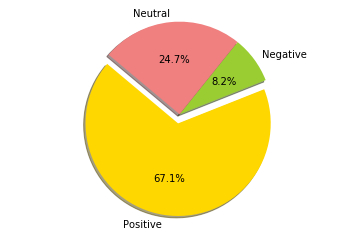

In [12]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [dict['positive'],dict['negative'],dict['neutral']]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

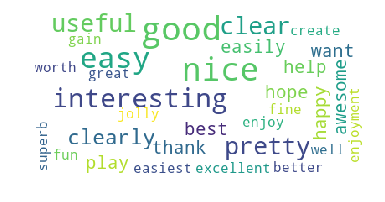

In [13]:
p=[]
for i in positive:
    a=i.split()
    for j in a:
        if((sid.polarity_scores(j))['compound']>0):
            p.append(j)
p1=" ".join(p)
wordcloud = WordCloud(background_color='white',
max_words=200,max_font_size=40,random_state=42).generate(p1)
fig=plt.imshow(wordcloud)
plt.axis('off')
plt.show()